<a href="https://colab.research.google.com/github/hillahalevi/Big-data/blob/main/Copy_of_HW_2_Version_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework Assignment 2
### [The Art of Analyzing Big Data - The Data Scientist’s Toolbox](https://www.ise.bgu.ac.il/labs/fire/lectures.html)
#### By Dr. Michael Fire 

## Dataset Collecting

**Question 1**: Write a function that collects all titles and number of votes for each title of a given [hacker news page](http://news.ycombinator.com) (15pt)


In [ ]:
import requests
from bs4 import BeautifulSoup
import re

def get_titles_and_votes(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')

    titles = []
    for title in soup.find_all('td', {'class': 'title'}):
        if title.a:
            titles.append(title.a.text)

    votes = soup.find_all('span', class_='score')
    vote_values = [int(re.findall(r'\d+', vote.text)[0]) for vote in votes]

    titles_and_votes = list(zip(titles, vote_values))

    return titles_and_votes

In [ ]:
url = 'https://news.ycombinator.com/'
titles_and_votes = get_titles_and_votes(url)
print(titles_and_votes)

[('New Orleans teenagers found a new proof of the Pythagorean Theorem', 398), ('USPS facility in Utah does nothing but decipher bad handwriting', 25), ("IRB's Built-In Measure", 6), ('GNU+Linux laptops with Libreboot preinstalled, based on coreboot', 166), ('A 1.5GB string', 174), ('Lonely Individuals Process the World in Idiosyncratic Ways', 92), ('Writing a Simple Garbage Collector in C (2020)', 110), ('FCC warns Portland church to shut down pirate FM operating under its steeple', 162), ('Show HN: A ChatGPT TUI with custom bots', 105), ('FAA K-12 Airport Design Challenge in Minecraft', 220), ('To Supercharge Learning, Look to Play', 135), ('Why computer modeling should become a popular hobby (1996)', 57), ('Dooble Web Browser', 43), ('Building a Database in the 2020s', 28), ("A Rubyist's Walk Along the C-Side (Part 10): Benchmarking", 60), ('FunDSP 0.13 – Audio Processing and Synthesis Library for Rust', 34), ('Mainboards supported by coreboot', 40), ('QSL Card', 82), ('PyDPainter 1.

**Question 2**:  Write a function that collects data on four Marvel movies from [The Movie Database](https://www.themoviedb.org). You can use [tmdbv3api](https://pypi.org/project/tmdbv3api/) (15pt)

In [ ]:
pip install tmdbv3api


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tmdbv3api

import os
from tmdbv3api import TMDb
from tmdbv3api import Movie

def get_movie_data():
    # Authenticate with TMDb API
    tmdb = TMDb()
    tmdb.api_key = os.environ.get('3b92261bef8ad565d101d370c2f83df6')

    # Define movie IDs to fetch data for
    movie_ids = [299536, 284054, 299537, 363088]

    # Collect data on each movie
    movie_data = []
    for movie_id in movie_ids:
        movie = Movie()
        details = movie.details(movie_id)
        credits = movie.credits(movie_id)

        # Extract relevant data from movie details and credits
        data = {
            'title': details['title'],
            'overview': details['overview'],
            'release_date': details['release_date'],
            'runtime': details['runtime'],
            'budget': details['budget'],
            'revenue': details['revenue'],
            'genres': [genre['name'] for genre in details['genres']],
            'cast': [cast_member['name'] for cast_member in credits['cast'][:5]],
            'crew': [crew_member['name'] for crew_member in credits['crew'] if crew_member['job'] == 'Director']
        }
        movie_data.append(data)

    return movie_data



In [ ]:
get_movie_data()

## Kickstarter Projects Dataset

Using the [Kickstarter Projects Dataset](https://www.kaggle.com/kemical/kickstarter-projects#ks-projects-201801.csv) and Pandas, please answer one of following questions:

**Note:** Use ks-projects-201801.csv data

### <span style="color:red"> Please answer only **one** of the following questions according to your (ID number + 1) (use the formula **<YOUR_ID> mod 3 +1**) </span>

In [ ]:
# which question to answer - put your ID number and run the code 
your_id  = "208953083"
q = (int(your_id) + 1) % 3 + 1
print("You need to answer questions %s and 4" % q)

You need to answer questions 1 and 4


In [ ]:
import json
import os

# Installing the Kaggle package
!pip install kaggle 
!pip install pony


#Important Note: complete this with your own key - after running this for the first time remmember to **remove** your API_KEY
api_token = {"username":"hilla464","key":"2ebc2419b9fbaf4902445878b377659b"}


# creating kaggle.json file with the personal API-Key details 
# You can also put this file on your Google Drive
!mkdir /root/.kaggle
with open('/root/.kaggle/kaggle.json', 'w') as file:
  json.dump(api_token, file)
!chmod 600 /root/.kaggle/kaggle.json
!mkdir ./datasets

# Creating a dataset directory
!mkdir ./datasets/kickstarter-projects

# download the dataset from Kaggle and unzip it
!kaggle datasets download kemical/kickstarter-projects  -p ./datasets/kickstarter-projects
!chdir ./datasets/kickstarter-projects
!unzip  ./datasets/kickstarter-projects/*.zip  -d ./datasets/kickstarter-projects/

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.9/313.9 KB 9.8 MB/s eta 0:00:00
 49% 18.0M/36.8M [00:00<00:00, 184MB/s]
100% 36.8M/36.8M [00:00<00:00, 194MB/s]
/bin/bash: chdir: command not found
Archive:  ./datasets/kickstarter-projects/kickstarter-projects.zip
  inflating: ./datasets/kickstarter-projects/ks-projects-201612.csv  
  inflating: ./datasets/kickstarter-projects/ks-projects-201801.csv  


**Question 1:** On average which project category received the lowest number of backers? (15 pt) 

In [ ]:
import pandas as pd

# Load the Kickstarter Projects Dataset
df = pd.read_csv('/content/datasets/kickstarter-projects/ks-projects-201801.csv')

# Group the dataset by project category and calculate the average number of backers
category_stats = df.groupby('category')['backers'].mean().reset_index()

# Find the project category with the lowest average number of backers
lowest_backers = category_stats.loc[category_stats['backers'].idxmin()]

print(f"The project category with the lowest average number of backers is {lowest_backers['category']} with an average of {lowest_backers['backers']:.2f} backers.")


The project category with the lowest average number of backers is Crochet with an average of 7.85 backers.


**Question 2:** On average which project category received the lowest pledged USD? (15 pt)

**Question 3:** In which month is there the lowest number of projects? (15 pt)

**Question 4 (for all):** Visualize your answer using matplotlib or seaborn (15pt)

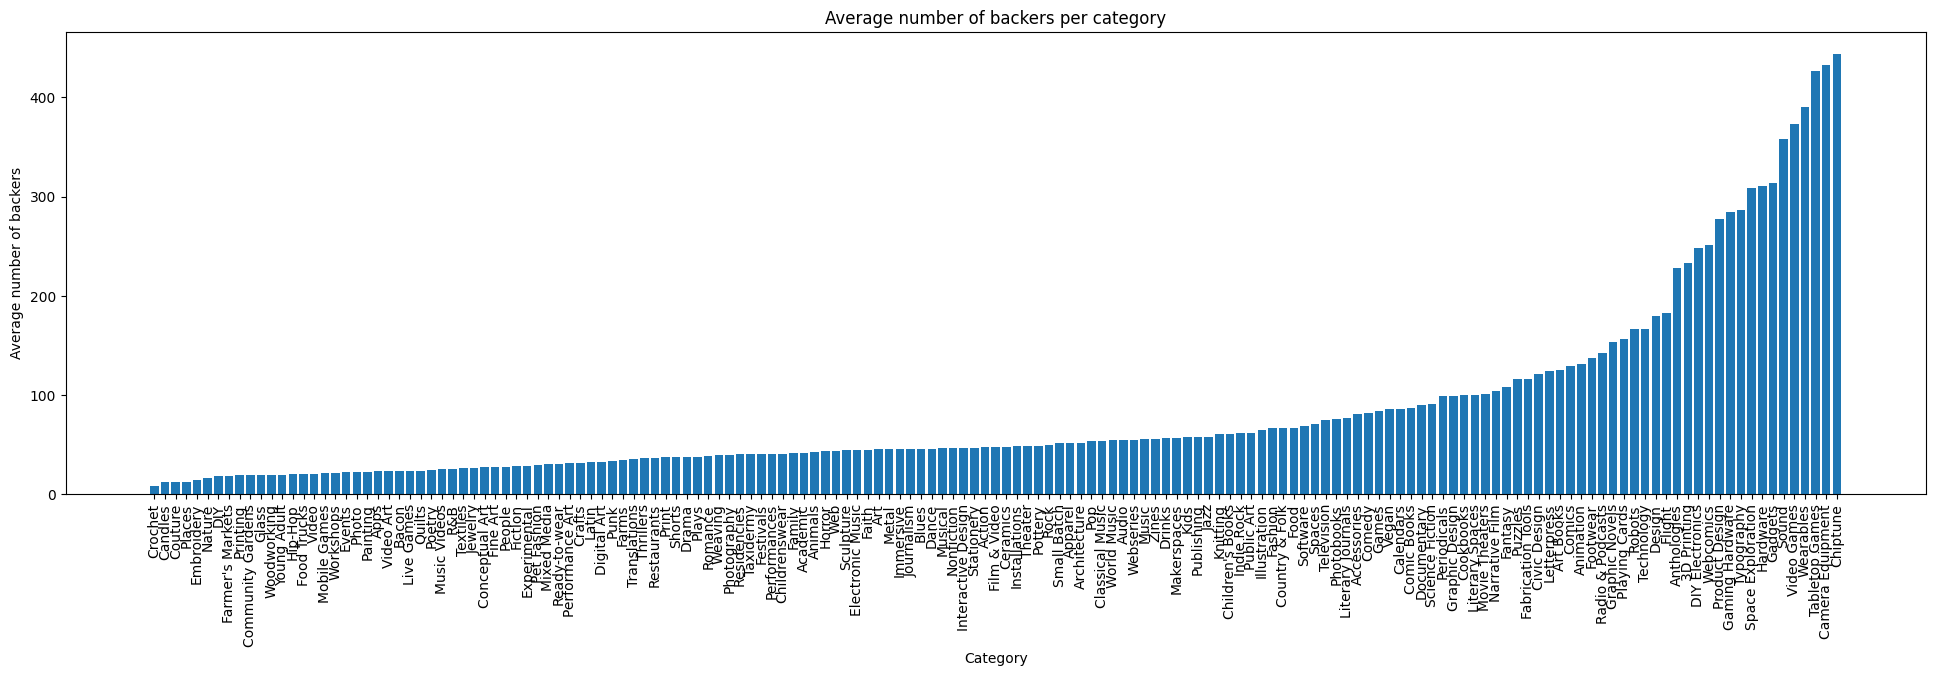

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Compute the average number of backers per category
avg_backers_by_category = df.groupby('category')['backers'].mean().sort_values()

# Create a bar chart
fig, ax = plt.subplots(figsize=(24, 6))
ax.bar(avg_backers_by_category.index, avg_backers_by_category.values, width=0.8)

# Set the chart title and axis labels
ax.set_title('Average number of backers per category')
ax.set_xlabel('Category')
ax.set_ylabel('Average number of backers')

# Rotate the category labels for better visibility
plt.xticks(rotation=90)

# Show the chart
plt.show()

## The Marvel Universe Social Network

Using the [The Marvel Universe Social Network](https://www.kaggle.com/csanhueza/the-marvel-universe-social-network) and  **Pandas**, please answer the following questions:

**Question 1:** Write code which calculate the top-20 most friendly characters, i.e., characters with the 
    highest number of friends. Please use _hero_network.csv_ file (15pt). 
    
**Note:** Not all the links in this dataset are symmetric.

In [ ]:
# Creating a dataset directory
!mkdir ./datasets/mcu

# download the dataset from Kaggle and unzip it
!kaggle datasets download csanhueza/the-marvel-universe-social-network  -p ./datasets/mcu
!chdir ./datasets/kickstarter-projects
!unzip  ./datasets/mcu/*.zip  -d ./datasets/mcu/

 73% 2.00M/2.72M [00:00<00:00, 2.86MB/s]
100% 2.72M/2.72M [00:00<00:00, 3.18MB/s]
/bin/bash: chdir: command not found
Archive:  ./datasets/mcu/the-marvel-universe-social-network.zip
  inflating: ./datasets/mcu/edges.csv  
  inflating: ./datasets/mcu/hero-network.csv  
  inflating: ./datasets/mcu/nodes.csv  


In [ ]:
# Load data into a Pandas dataframe
df = pd.read_csv('/content/datasets/mcu/hero-network.csv')

# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Filter out rows where a hero is shown as a friend of themselves
df = df[df['hero1'] != df['hero2']]

# Filter out rows where a hero is shown as a friend of another hero, but the other hero doesn't exist in the dataset
heroes = df['hero1'].unique()
df = df[df['hero2'].isin(heroes)]

# Calculate the number of friends for each hero
hero_counts = pd.concat([df['hero1'], df['hero2']]).value_counts()

# Get the top 20 most friendly characters
top_20 = hero_counts.head(20)

print(top_20)

CAPTAIN AMERICA         2836
SPIDER-MAN/PETER PAR    2541
IRON MAN/TONY STARK     2222
WOLVERINE/LOGAN         2023
THING/BENJAMIN J. GR    2013
MR. FANTASTIC/REED R    1951
HUMAN TORCH/JOHNNY S    1931
SCARLET WITCH/WANDA     1927
THOR/DR. DONALD BLAK    1908
BEAST/HENRY &HANK& P    1828
VISION                  1809
INVISIBLE WOMAN/SUE     1789
HAWK                    1704
CYCLOPS/SCOTT SUMMER    1609
STORM/ORORO MUNROE S    1573
ANGEL/WARREN KENNETH    1557
HULK/DR. ROBERT BRUC    1556
WASP/JANET VAN DYNE     1548
SHE-HULK/JENNIFER WA    1531
DR. STRANGE/STEPHEN     1520
dtype: int64


**Question 2:** Using Pandas and Networkx create a graph object of The Marvel Universe Social Network with the 150 most "friendly" characters (10pt).
    The vertices in that graph need to be relative to the size of each character's number of links (also referred to as the vertex degree) (10pt).
Please color each node in the graph according to character type according to data in the *nodes.csv* file (5pt)

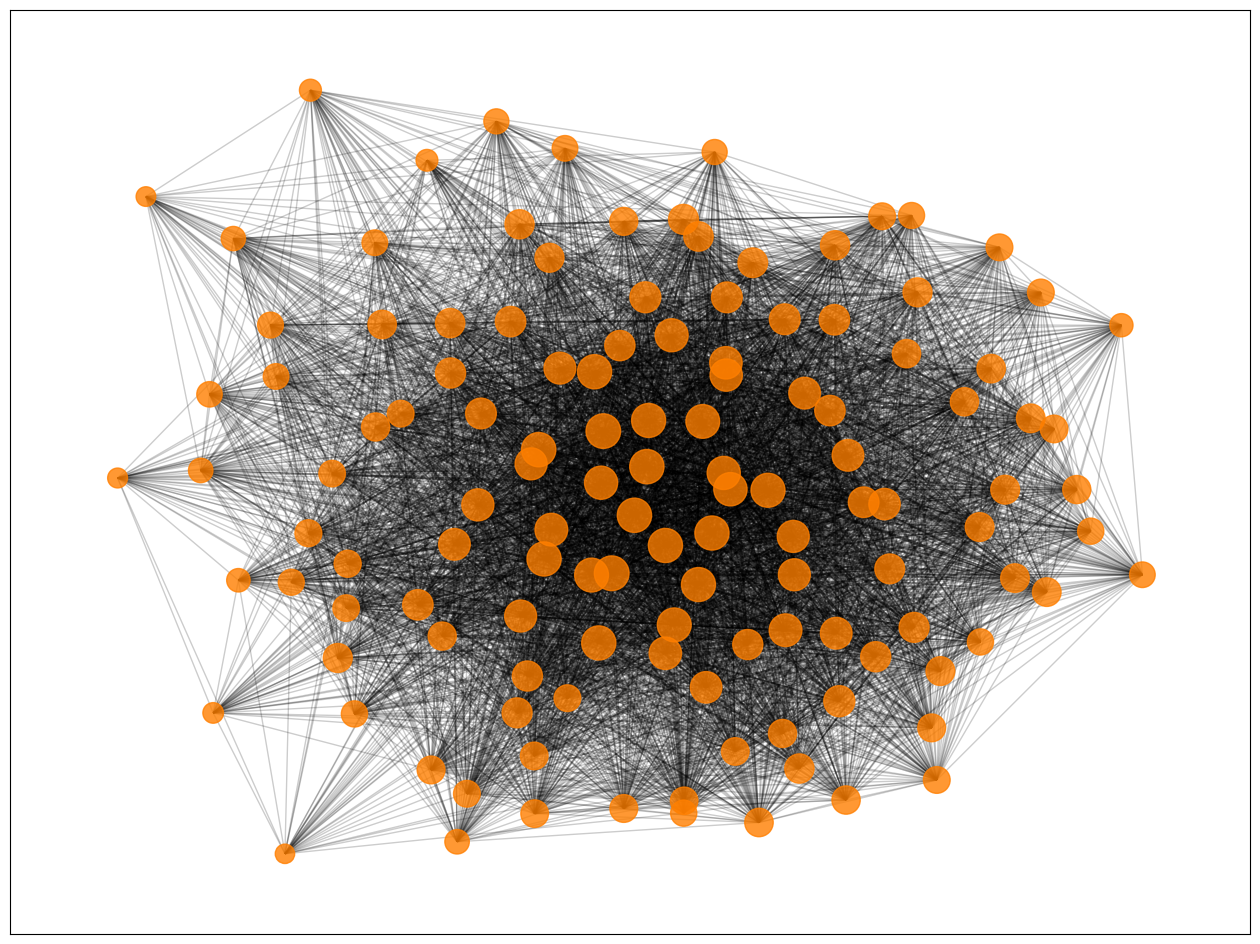

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load hero_network.csv and nodes.csv
hero_network = df
nodes = pd.read_csv('/content/datasets/mcu/nodes.csv')

# Get the 150 most "friendly" characters
top_150 = hero_network.groupby('hero1').count().sort_values(by='hero2', ascending=False).head(150).reset_index()

# Create the graph object
G = nx.Graph()

# Add nodes with attributes
for index, row in nodes.iterrows():
    if row['node'] in list(top_150['hero1']):
        G.add_node(row['node'], size=top_150[top_150['hero1'] == row['node']]['hero2'].values[0])
        for col in nodes.columns[1:]:
            if col != 'node':
                G.nodes[row['node']][col] = row[col]

# Add edges
for index, row in hero_network.iterrows():
    if row['hero1'] in list(G.nodes()) and row['hero2'] in list(G.nodes()):
        G.add_edge(row['hero1'], row['hero2'])

# Set up positions for plotting
pos = nx.spring_layout(G)

# Color nodes by type
colors = {}
for col in nodes.columns[1:]:
    if col != 'node':
        types = nodes[col].unique()
        for i, t in enumerate(types):
            colors[t] = plt.cm.Set1(i/len(types))
node_colors = [colors[G.nodes[node][col]] for col in nodes.columns[1:] for node in G.nodes() if col in G.nodes[node].keys()]
fig, ax = plt.subplots(figsize=(16, 12))

# Draw the graph
nx.draw_networkx_nodes(G, pos, node_size=[d * 5 for n, d in G.degree()], node_color=node_colors, alpha=0.8)
nx.draw_networkx_edges(G, pos, alpha=0.2, ax=ax)

# Show the plot
plt.show()


**Bonus:** Visualize the above network using [Cytoscape](https://cytoscape.org) or [Gephi](https://gephi.org) or [D3](https://d3js.org) (10pt)

In [ ]:
pip install ipycytoscape


takes too long 

In [ ]:
import ipycytoscape

# Create the graph object with ipycytoscape
cyto_graph = ipycytoscape.CytoscapeWidget()
cyto_graph.graph.add_graph_from_networkx(G)

# Set the node colors in ipycytoscape
for node in cyto_graph.graph.nodes:
    node_data = cyto_graph.graph.nodes[node]
    node_type = node_data['type']
    if node_type == 'hero':
        node_data['color'] = 'red'
    elif node_type == 'comic':
        node_data['color'] = 'blue'

# Display the ipycytoscape graph
cyto_graph.set_style([{
    'selector': 'node',
    'style': {
        'label': 'data(id)',
        'background-color': 'data(color)',
        'height': 30,
        'width': 30,
        'font-size': 20
    }
}])
cyto_graph.s

In [ ]:
import pandas as pd
import ipycytoscape

# Load hero_network.csv and nodes.csv
hero_network = pd.read_csv('/content/datasets/mcu/hero-network.csv')
nodes = pd.read_csv('/content/datasets/mcu/nodes.csv')

## Get the 100 most "friendly" characters
top_100 = hero_network.groupby('hero1').count().sort_values(by='hero2', ascending=False).head(100).reset_index()

# Create the graph object
graph_data = {'nodes': [], 'edges': []}

# Add nodes with attributes
for index, row in nodes.iterrows():
    if row['node'] in list(top_100['hero1']):
        graph_data['nodes'].append({
            'data': {
                'id': row['node'],
                'type': row['type']
            }
        })

# Add edges
for index, row in hero_network.iterrows():
    if row['hero1'] in list(top_100['hero1']) and row['hero2'] in list(top_100['hero1']):
        graph_data['edges'].append({
            'data': {
                'source': row['hero1'],
                'target': row['hero2']
            }
        })

# Create the graph widget
graph = ipycytoscape.CytoscapeWidget()
graph.graph.add_graph_from_json(graph_data)
graph.set_style([{
    'selector': 'node',
    'style': {
        'label': 'data(id)',
        'background-color': 'mapData(type, "hero", "red", "comic", "blue", "grey")'
    }
}])

# Set up the layout
layout = {
    'name': 'cose',
    'idealEdgeLength': 100,
    'nodeOverlap': 20,
    'refresh': 20,
    'fit': True,
    'padding': 30,
    'randomize': False,
    'componentSpacing': 100,
    'nodeRepulsion': 400000,
    'edgeElasticity': 100,
    'nestingFactor': 5,
    'gravity': 80,
    'numIter': 1000,
    'initialTemp': 200,
    'coolingFactor': 0.95,
    'minTemp': 1.0
}

# Set the layout
graph.set_layout(layout)

# Display the graph widget
display(graph)

TypeError: ignored